In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./shopping_trends.csv")
data.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1705,1706,39,Male,Jewelry,Accessories,29,South Dakota,L,Cyan,Summer,3.4,No,Venmo,2-Day Shipping,No,No,49,Venmo,Bi-Weekly
1085,1086,25,Male,Jewelry,Accessories,85,Utah,M,Turquoise,Winter,3.0,No,PayPal,Store Pickup,Yes,Yes,23,Venmo,Fortnightly
819,820,55,Male,Sunglasses,Accessories,36,Colorado,S,Teal,Winter,4.8,Yes,Bank Transfer,Next Day Air,Yes,Yes,28,Debit Card,Quarterly
528,529,34,Male,Sneakers,Footwear,88,Maryland,S,Beige,Winter,3.2,Yes,Venmo,Express,Yes,Yes,40,Cash,Annually
2812,2813,66,Female,Hoodie,Clothing,91,North Dakota,XL,Magenta,Fall,3.8,No,Debit Card,Store Pickup,No,No,1,Credit Card,Every 3 Months


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
data['Customer ID'] = data['Customer ID'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   object 
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## 无缺失数值，切数值类型完好

## 数据分析

In [6]:
data.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


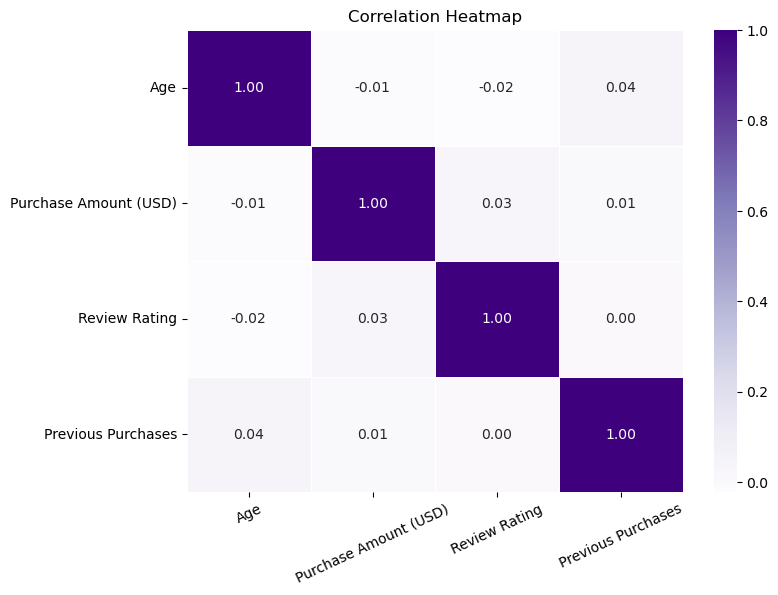

In [7]:
corr = data[['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=25)
plt.show()

## 根据热力图结果可以发现，其中数值型数据之间并不存在明显相关性，即Age,Purchase Amount (USD),Review Rating,Previous Purchase之间无明显相关性

## 2.商品类别

### （1）各项商品与金额

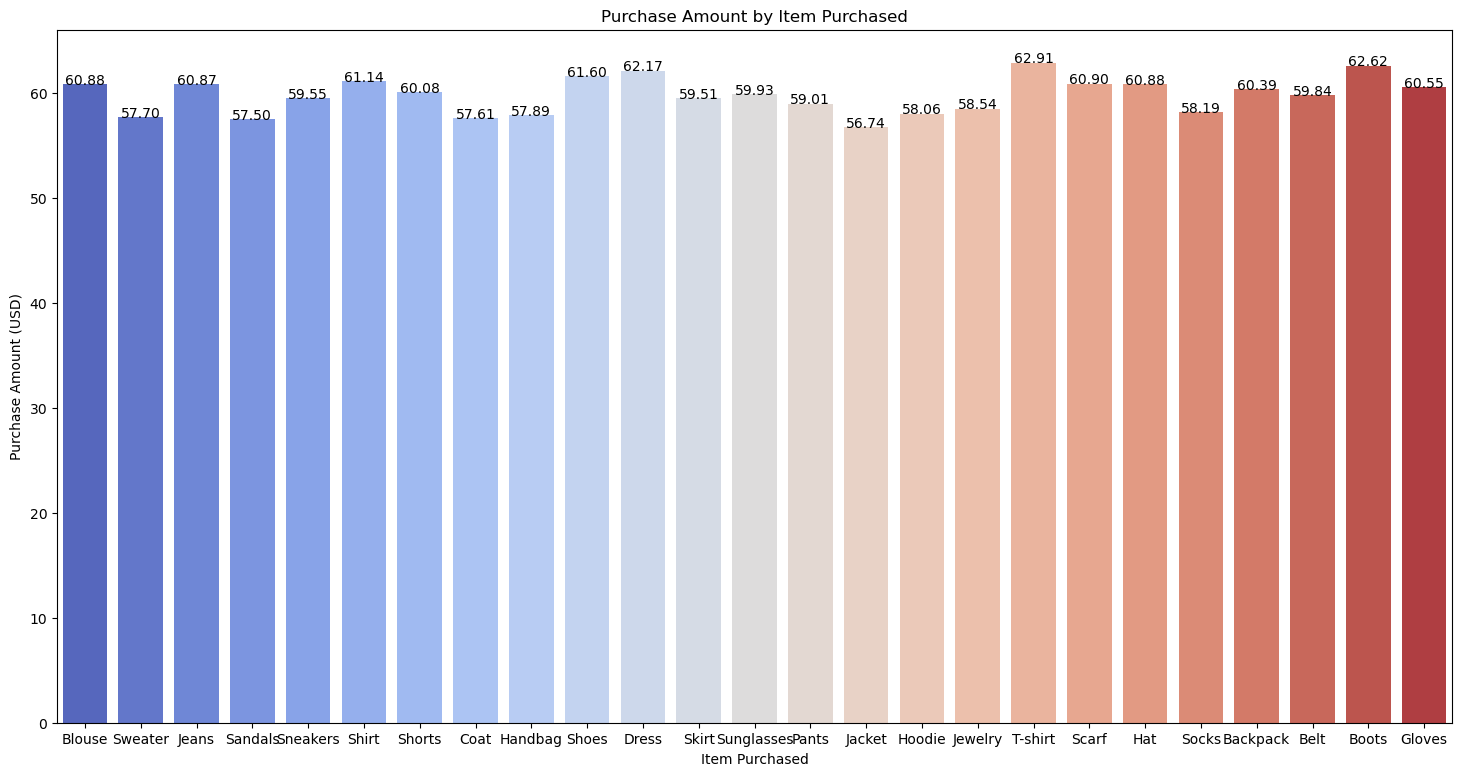

In [8]:
plt.figure(figsize=(18, 9))
#默认使用numpy.mean()作为聚合函数，也可以通过estimator参数指定其他聚合函数
ax = sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=data, palette='coolwarm',ci = None)
for p in ax.patches:
    height = p.get_height()  # 获取条形的高度
    ax.text(x=p.get_x() + p.get_width() / 2., y=height, s=f'{height:.2f}', ha='center')

plt.title('Purchase Amount by Item Purchased')
plt.show()

## （2）商品类别与金额——箱型图

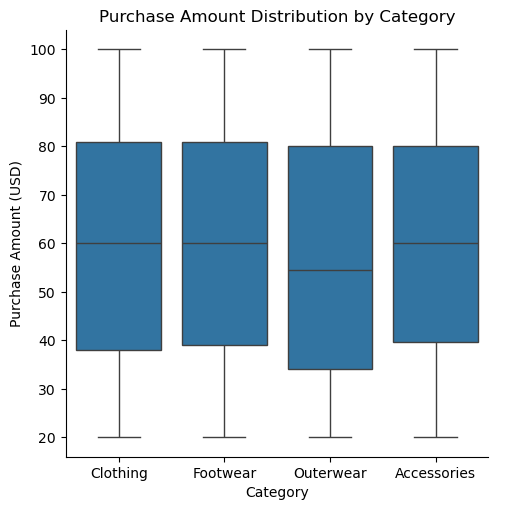

In [9]:
#height=6 设定图形的高度为 6 个单位。
#aspect=2 设定图形的宽高比为 2
sns.catplot(data=data,x='Category',y='Purchase Amount (USD)', kind = 'box',)
plt.title("Purchase Amount Distribution by Category")
plt.show()

## （3）商品类别与金额——小提琴图

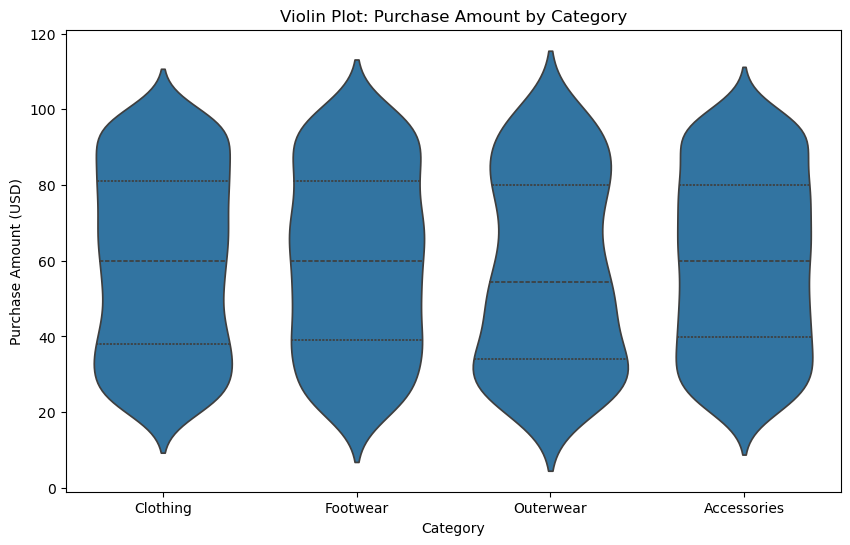

In [10]:
plt.figure(figsize=(10,6))
#inner='quart'：设置小提琴内部的显示内容，quart 表示在小提琴内部显示四分位数。
sns.violinplot(x='Category',y='Purchase Amount (USD)',data=data,inner='quart')
plt.title("Violin Plot: Purchase Amount by Category")
plt.show()

## （4）商品类别与数量

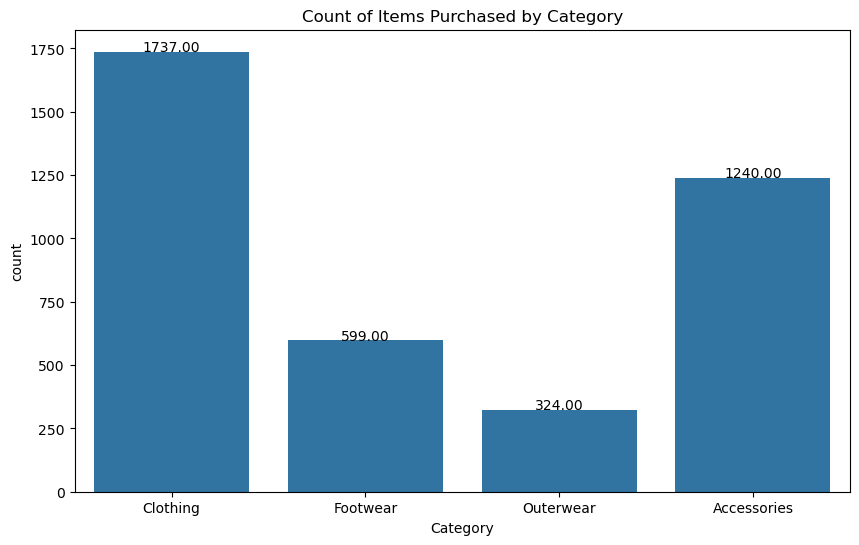

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Category', data=data)
for p in ax.patches:
    height = p.get_height()  # 获取条形的高度
    ax.text(x=p.get_x() + p.get_width() / 2., y=height, s=f'{height:.2f}', ha='center')

plt.title('Count of Items Purchased by Category')
plt.show()

## （5）购买频率占比

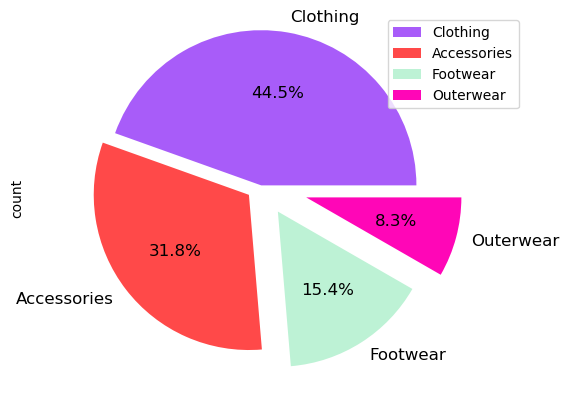

In [12]:
counts = data['Category'].value_counts()
#定义了 explode 元组，存储每个部分的 “爆炸” 值，这里是 (0, 0.1, 0.2, 0.3)
explode = (0, 0.1, 0.2, 0.3) 

colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA']
#fontsize=12：设置饼图上标签的字体大小为 12
#explode=explode：使用 explode 元组中的 “爆炸” 值将相应部分突出显示。
counts.plot(kind = 'pie',fontsize=12, colors=colors, explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=counts.index, loc='best')
plt.show()

## （6）各产品销量

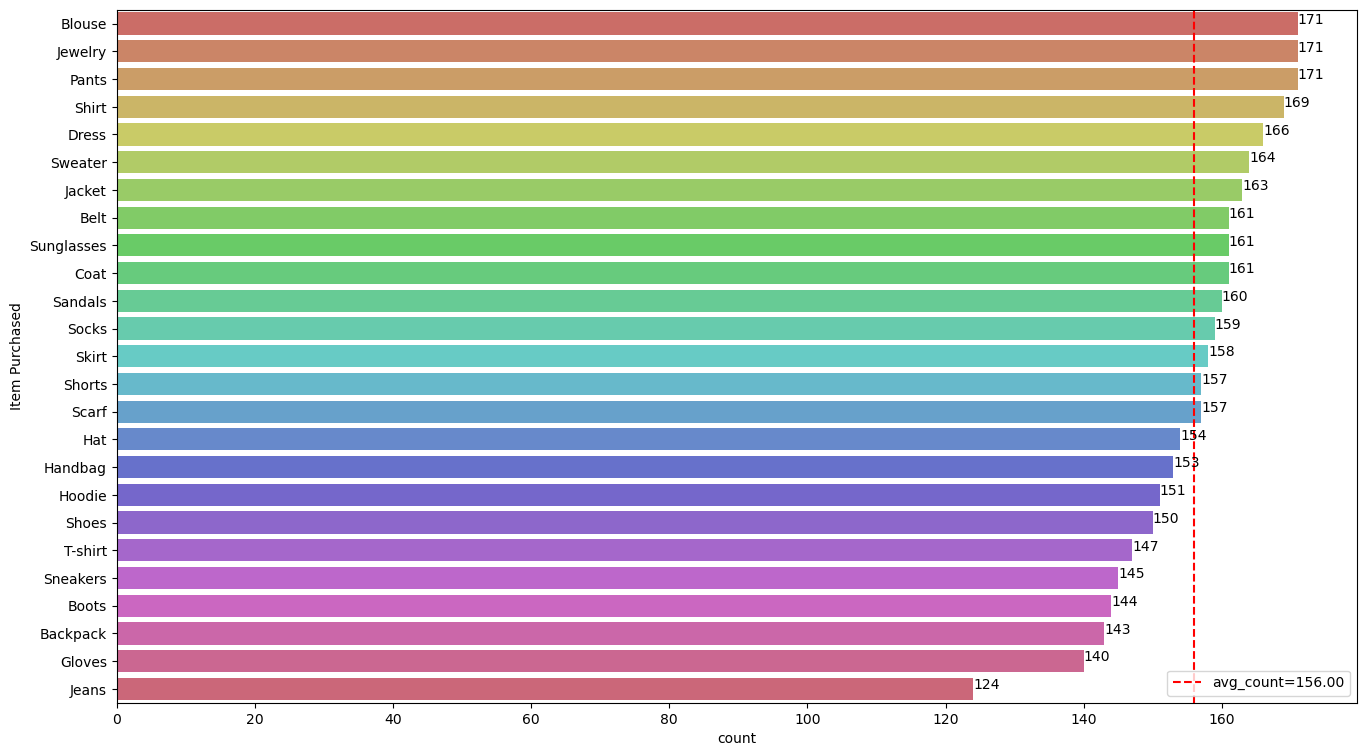

In [13]:
#生成很坐标的数值标签函数
def barw(ax):
    for p in ax.patches:
        val = p.get_width()
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(int(val), (x, y))
item_counts = data['Item Purchased'].value_counts()

plt.figure(figsize=(16,9))
# 生成颜色列表
colors = sns.color_palette("hls", len(item_counts))
#order参数为排序参数，对 Item Purchased 列中的元素按出现次数进行排序，将出现次数最多的元素排在最上方
ax0 = sns.countplot(data=data, y='Item Purchased', order=data['Item Purchased'].value_counts().index, palette=colors)
# 计算购买次数均值
mean_count = data['Item Purchased'].value_counts().mean()
# 添加红色虚线表示均值
line = ax0.axvline(mean_count,color ='red',linestyle='--')
barw(ax0)
# 添加图例
ax0.legend([line],[f'avg_count={mean_count:.2f}'])
plt.show()

In [14]:
# 筛选出购买次数大于均值的商品，并按照购买次数降序排列
above_mean_items = item_counts[item_counts > mean_count].sort_values(ascending=False).reset_index()
#print(above_mean_items)
above_mean_items.columns = ['Item Purchased', 'Purchase Times']
#print(above_mean_items)
# 按照指定格式输出
result = above_mean_items.apply(lambda x: f"{x['Item Purchased']}({x['Purchase Times']})", axis=1)
#print(result)
#.tolist()方法转化为列表
result.tolist()

['Blouse(171)',
 'Jewelry(171)',
 'Pants(171)',
 'Shirt(169)',
 'Dress(166)',
 'Sweater(164)',
 'Jacket(163)',
 'Belt(161)',
 'Sunglasses(161)',
 'Coat(161)',
 'Sandals(160)',
 'Socks(159)',
 'Skirt(158)',
 'Shorts(157)',
 'Scarf(157)']

## 3.位置信息

In [15]:
#方法二
location_countss = data['Location'].value_counts().reset_index()

location_countss.rename(columns={'count':'location_counts'},inplace=True)
location_countss['total_count'] = location_countss['location_counts'].sum()
location_countss['Ratio'] = location_countss['location_counts']/location_countss['total_count']
print(location_countss)

          Location  location_counts  total_count     Ratio
0          Montana               96         3900  0.024615
1       California               95         3900  0.024359
2            Idaho               93         3900  0.023846
3         Illinois               92         3900  0.023590
4          Alabama               89         3900  0.022821
5        Minnesota               88         3900  0.022564
6         Nebraska               87         3900  0.022308
7         New York               87         3900  0.022308
8           Nevada               87         3900  0.022308
9         Maryland               86         3900  0.022051
10        Delaware               86         3900  0.022051
11         Vermont               85         3900  0.021795
12       Louisiana               84         3900  0.021538
13    North Dakota               83         3900  0.021282
14        Missouri               81         3900  0.020769
15   West Virginia               81         3900  0.0207

In [16]:
# 统计Location列每个值出现的次数
location_counts = data['Location'].value_counts()
# 取前十个最常见的值及其计数
top_10_locations = location_counts[:10]
# 计算每个位置的占比
total_count = top_10_locations.sum()
ratios = top_10_locations/total_count
# 创建包含地理位置和比例的数据框
pd.DataFrame({'Location': top_10_locations.index, 'Ratio': ratios})

,Location,Ratio
Location,,
Montana,Montana,0.106667
California,California,0.105556
Idaho,Idaho,0.103333
Illinois,Illinois,0.102222
Alabama,Alabama,0.098889
Minnesota,Minnesota,0.097778
Nebraska,Nebraska,0.096667
New York,New York,0.096667
Nevada,Nevada,0.096667


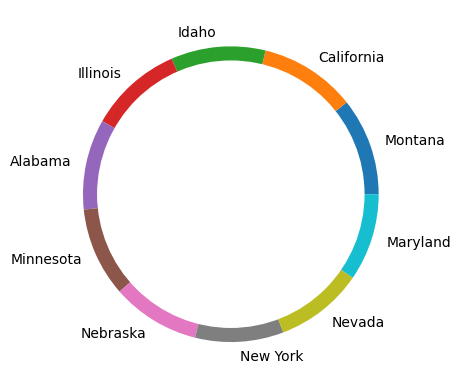

In [17]:
# 创建一个白色的圆形
my_circle = plt.Circle((0, 0), 0.9, color='white')
# 创建一个圆形对象，圆心坐标为 (0, 0)，半径为 0.9，颜色为白色

plt.pie(data['Location'].value_counts()[:10].values, 
        labels=data['Location'].value_counts()[:10].index)
# 使用 plt.pie 函数绘制饼图
# 选取 Location 列中元素的计数值作为饼图的数据，仅选取出现次数最多的前 10 个元素的值
# 选取 Location 列中元素作为饼图的标签，仅选取出现次数最多的前 10 个元素的索引

p = plt.gcf()
# 获取当前的图形对象（Figure）
p.gca().add_artist(my_circle)
# 将圆形添加到轴对象中
# 获取当前的轴对象（Axes），并将创建的圆形对象添加为轴对象的一个图形元素
plt.show()

## 4.性别对比

### （1）男女购买金额对比

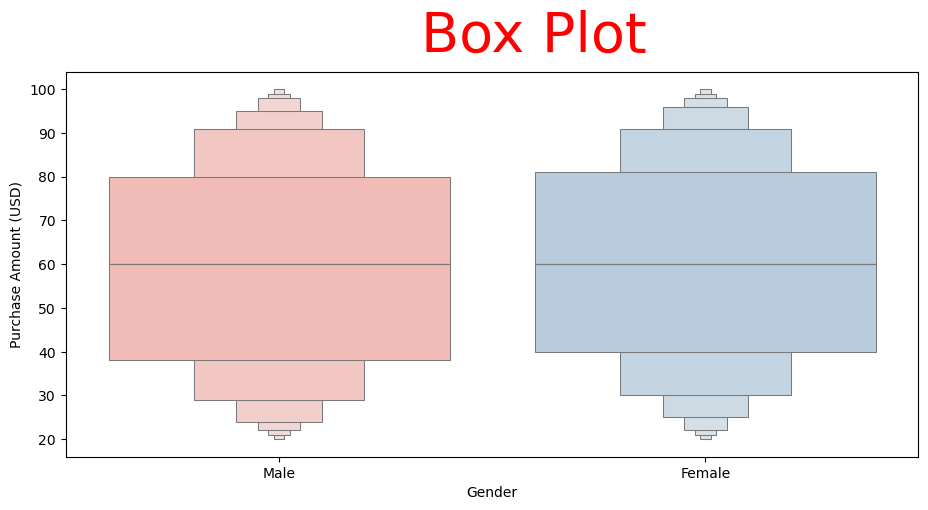

In [18]:
plt.figure(figsize=(11, 5))
plt.gcf().text(0.55, 0.95, "Box Plot", fontsize=40, color='Red', ha='center', va='center')
#palette="Pastel1"调色板
sns.boxenplot(x=data['Gender'], y=data['Purchase Amount (USD)'], palette="Pastel1")
'''
sns.boxplot：传统的箱线图，也称为箱须图，主要显示数据的五数概括（最小值、第一四分位数、中位数、第三四分位数、最大值）以及异常值。它使用四分位距（IQR）来确定异常值，异常值通常显示为单独的点或标记。
sns.boxenplot：也称为增强箱线图，是一种对箱线图的扩展，提供了更多关于数据分布的信息，尤其是在处理大数据集或具有复杂分布的数据时。它可以更好地展示数据的分布细节，包括尾部信息。

'''
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   object 
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

### （2）男女定量数据分布对比

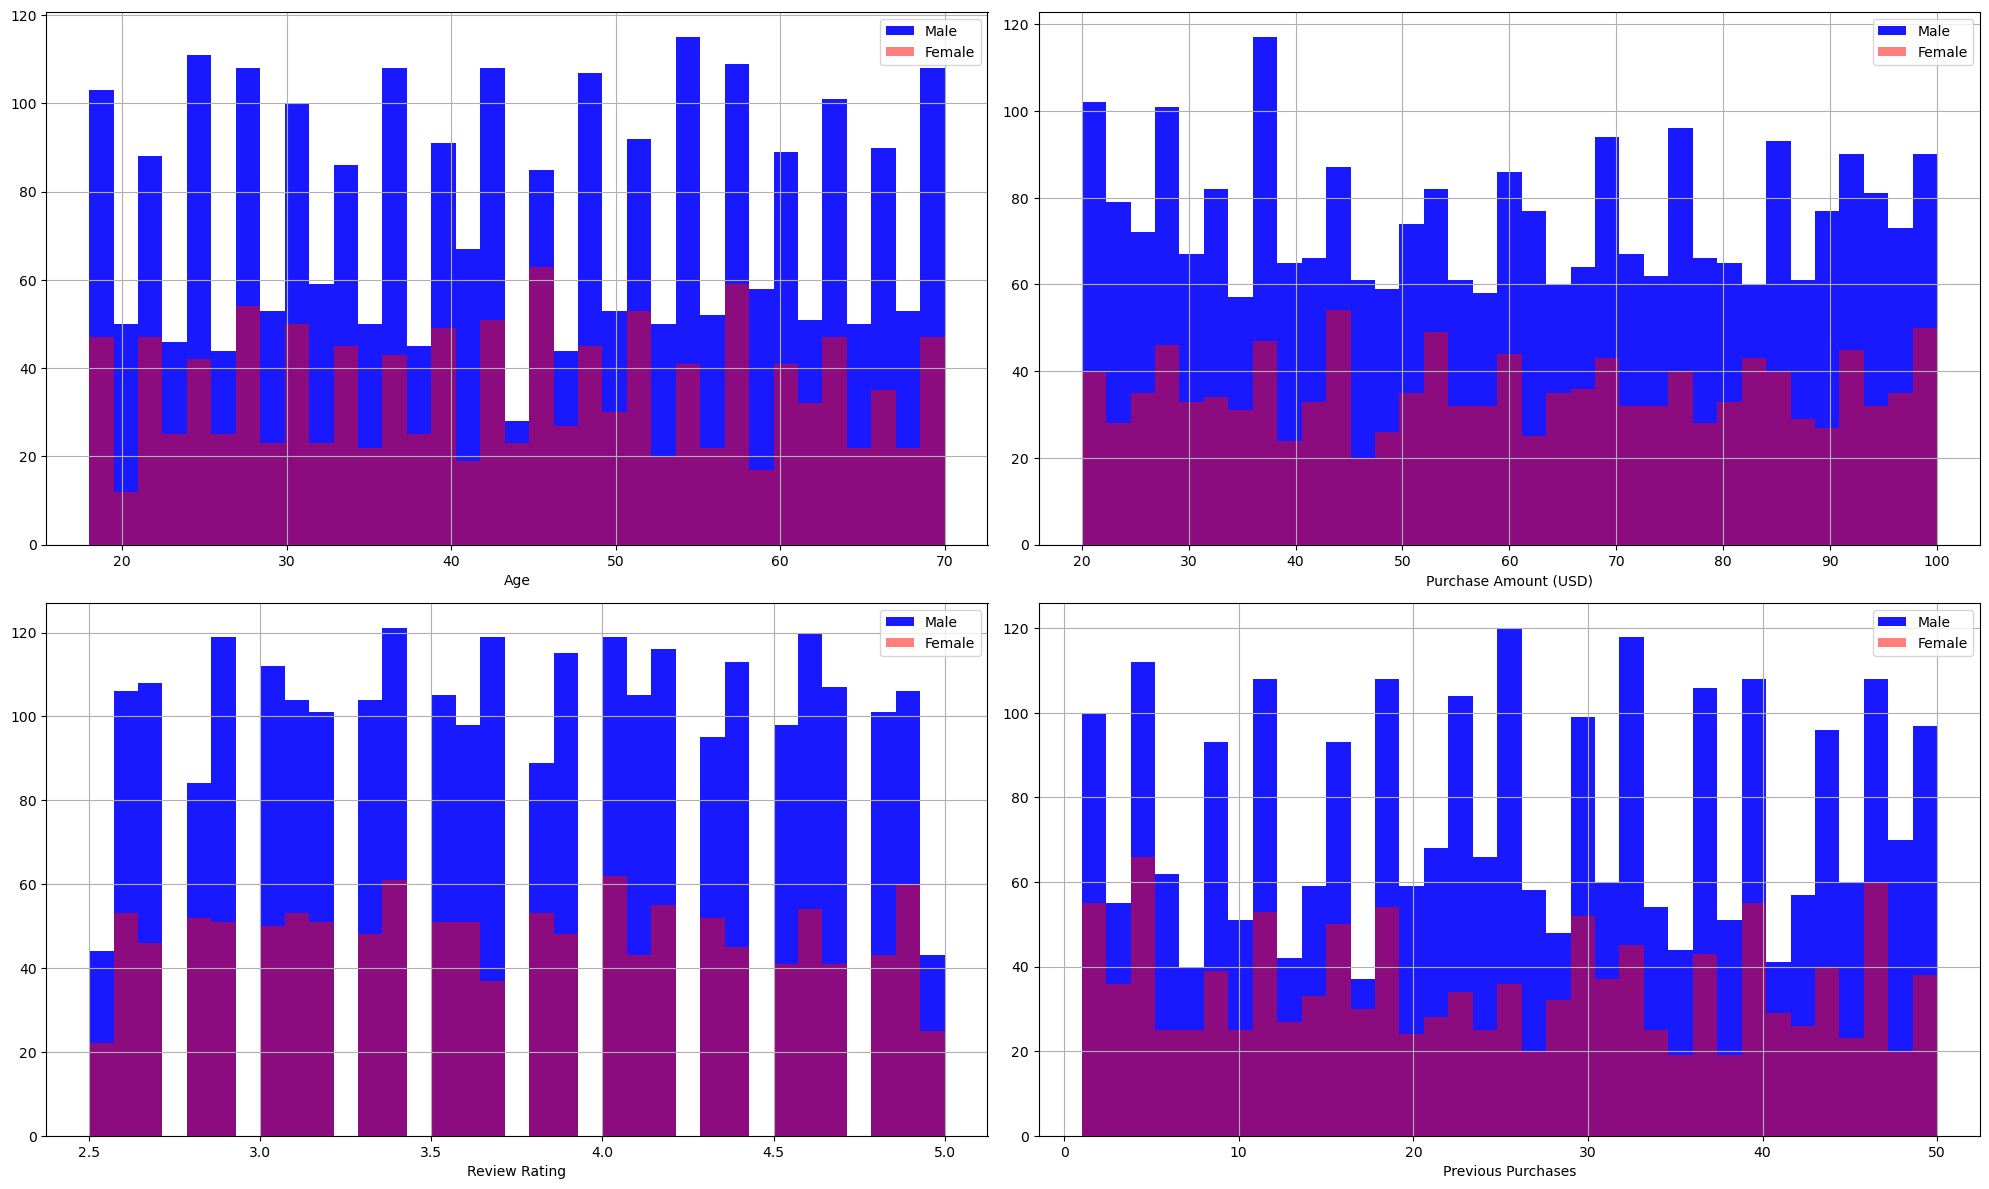

In [20]:
import math
# 统计符合条件的列的数量
count = sum(1 for col in data.columns if data[col].dtype in ['int64', 'float64'])
# 计算行数和列数
cols = math.ceil(math.sqrt(count))
rows = math.ceil(count / cols)

plt.figure(figsize=(20, 12))

i = 1
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.subplot(rows, cols, i)
        data[data['Gender'] == 'Male'][column].hist(bins=35, color='blue', label='Male', alpha=0.9)
        data[data['Gender'] == 'Female'][column].hist(bins=35, color='red', label='Female', alpha=0.5)

        plt.legend()
        plt.xlabel(column)
        i += 1

plt.tight_layout()
plt.show()

### （3）购买频率与性别、支付方式

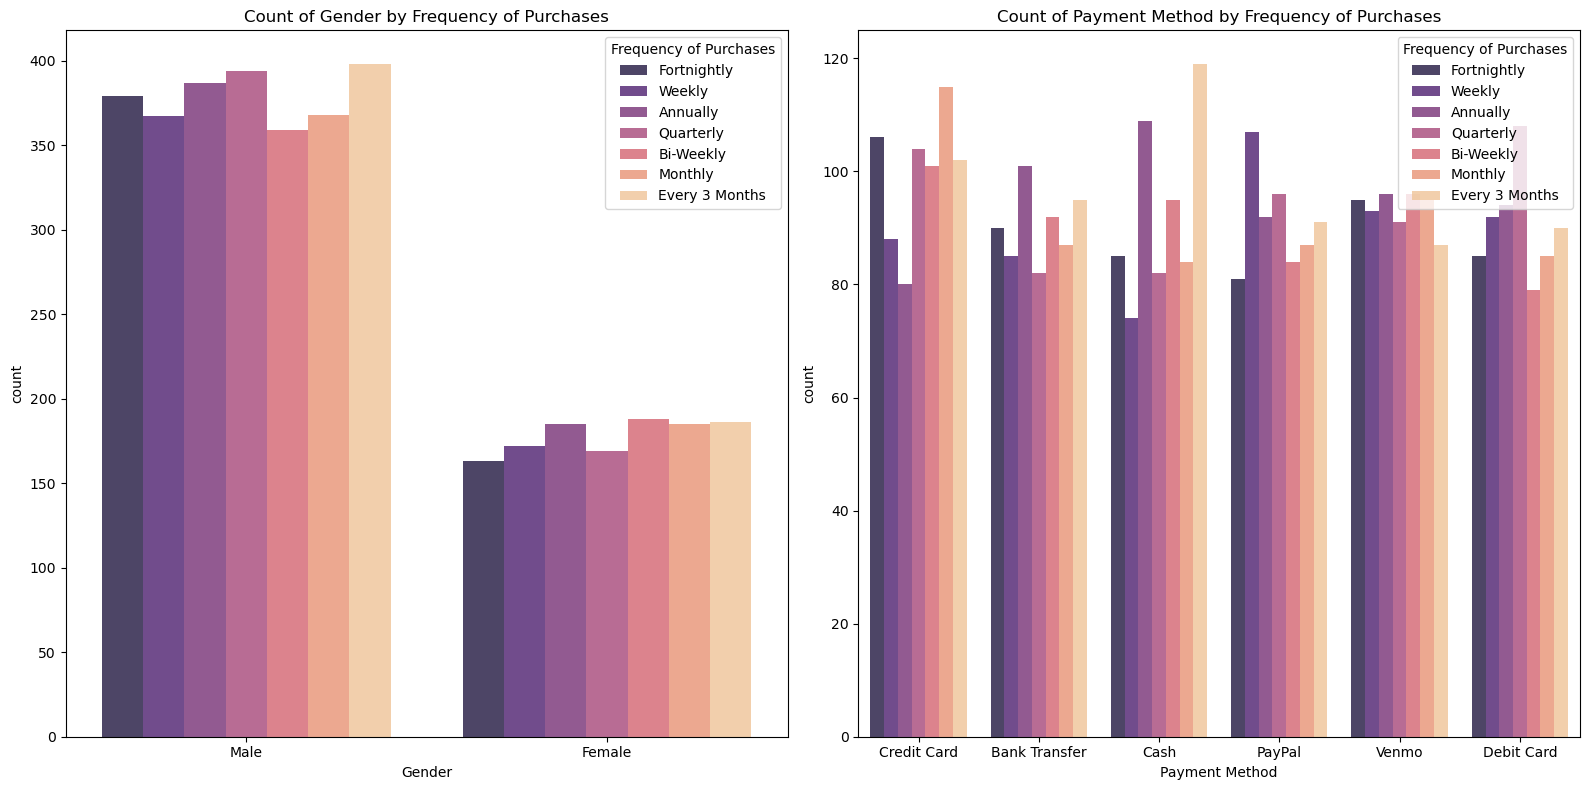

In [25]:
cat = ['Gender', 'Payment Method']

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# 使用 enumerate 和 zip 函数遍历 cat 列表和 ax.flatten() 列表
for column, axes in zip(cat, ax.flatten()):
#for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):
    sns.countplot(ax=axes, x=data[column], hue=data['Frequency of Purchases'], palette='magma', alpha=0.8)
    axes.set_title(f'Count of {column} by Frequency of Purchases')

# 如果 cat 列表的长度小于 ax.flatten() 的长度
if len(cat) < len(ax.flatten()):
    # 将多余的子图设置为不可见
    [axes.set_visible(False) for axes in ax.flatten()[len(cat):]]

plt.tight_layout()
plt.show()

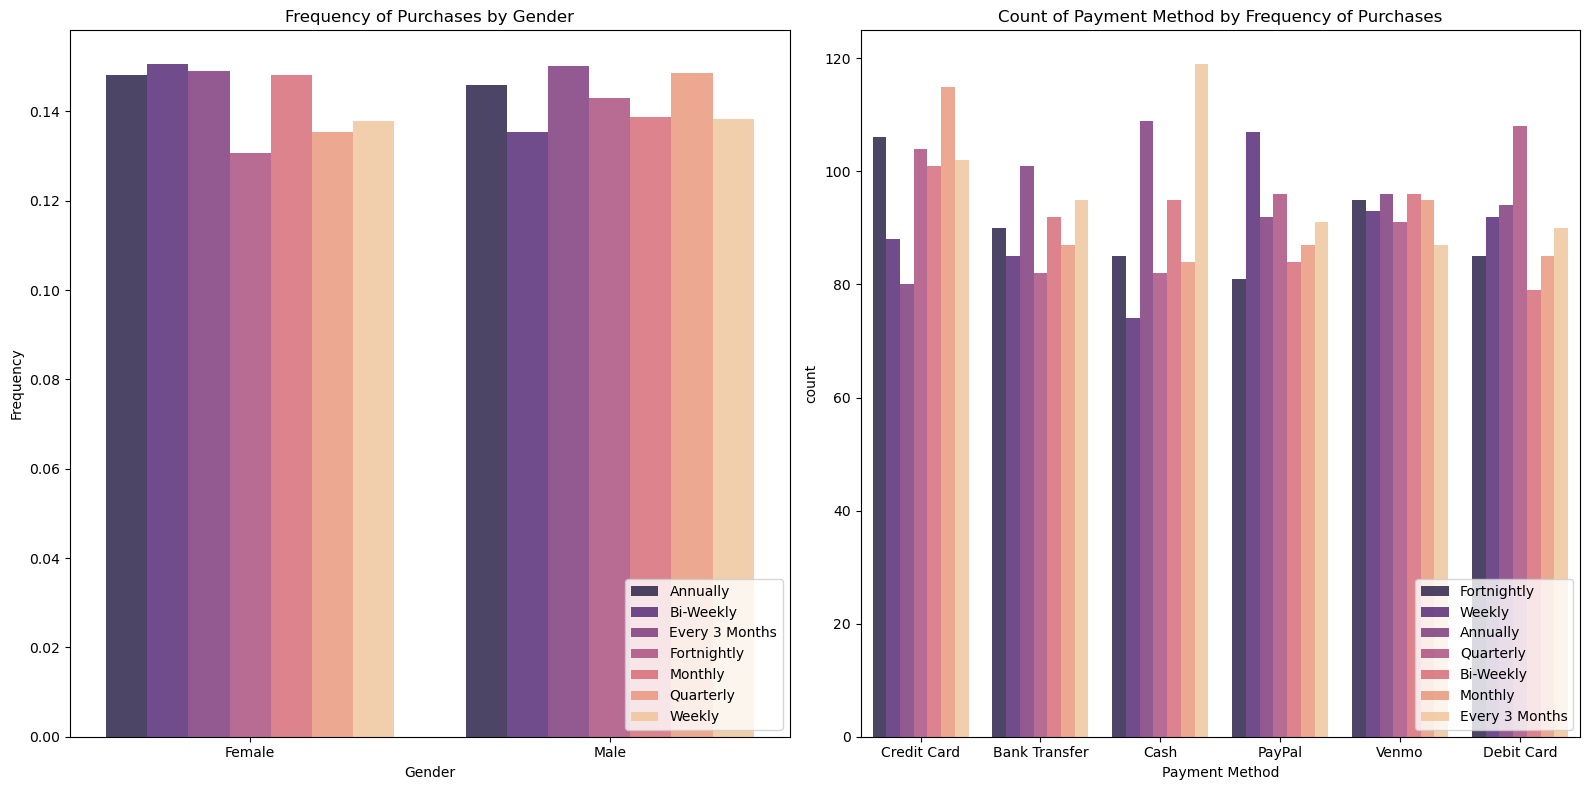

In [26]:
cat = ['Gender', 'Payment Method']

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for indx, (column, axes) in enumerate(zip(cat, ax.flatten())):
    if column == 'Gender':
        # 按性别分组并计算各购买频率的比例
        #统计按照['Gender', 'Frequency of Purchases']分组后每个组的个数，并重命名列为'count'
        gender_counts = data.groupby(['Gender', 'Frequency of Purchases']).size().reset_index(name='count')
        total_per_gender = data.groupby('Gender').size().reset_index(name='total')
        gender_merged = gender_counts.merge(total_per_gender, on='Gender')
        gender_merged['frequency'] = gender_merged['count'] / gender_merged['total']

        sns.barplot(ax=axes, x='Gender', y='frequency', hue='Frequency of Purchases', data=gender_merged, palette='magma', alpha=0.8)
        axes.set_title(f'Frequency of Purchases by {column}')
        axes.set_ylabel('Frequency')
    else:
        sns.countplot(ax=axes, x=data[column], hue=data['Frequency of Purchases'], palette='magma', alpha=0.8)
        axes.set_title(f'Count of {column} by Frequency of Purchases')
    # 将图例放在右下角
    axes.legend(loc='lower right')

if len(cat) < len(ax.flatten()):
    [axes.set_visible(False) for axes in ax.flatten()[len(cat):]]

plt.tight_layout()
plt.show()

### （4）不同季节男女消费金额

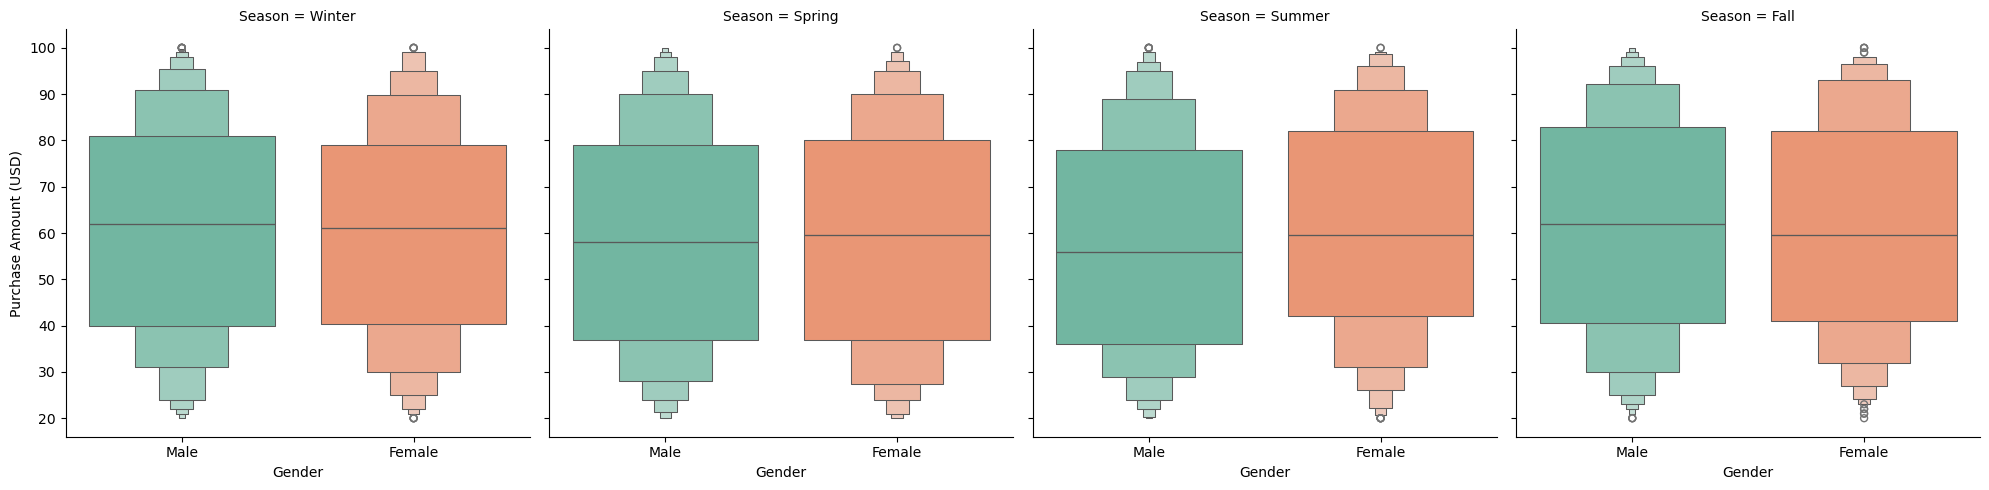

In [34]:
# 使用 sns.catplot 绘制分类图
# x="Gender": 将 Gender 列的数据作为分类变量显示在 x 轴上
# y="Purchase Amount (USD)": 将 Purchase Amount (USD) 列的数据作为数值变量显示在 y 轴上
# col="Season": 根据 Season 列将图形拆分为多个列的子图，每个子图将展示 Season 列中不同元素对应的 Gender 与 Purchase Amount (USD) 的关系
# kind="boxen": 绘图的类型为 boxen 图，它是一种增强版的箱线图，可显示更多分位数信息，适合大数据集展示数据分布
# palette="Set2": 使用 Set2 颜色调色板，为不同的 Gender 类别分配不同颜色
# height=5: 设置每个子图的高度为 5 个单位
# aspect=1: 设置每个子图的宽高比为 1:1，即宽度等于高度
# data=data: 指定要使用的数据来源为 data 数据集，这里 data 是一个 pandas 的 DataFrame 对象
# col_wrap=2: 设置每行最多显示 2 个子图，当子图数量较多时，会自动换行
sns.catplot(x="Gender", y="Purchase Amount (USD)", col="Season",
            kind="boxen", palette="Set2", height=5, aspect=1, data=data, col_wrap=4)
plt.show()

### （5）对不同产品的消费金额对比

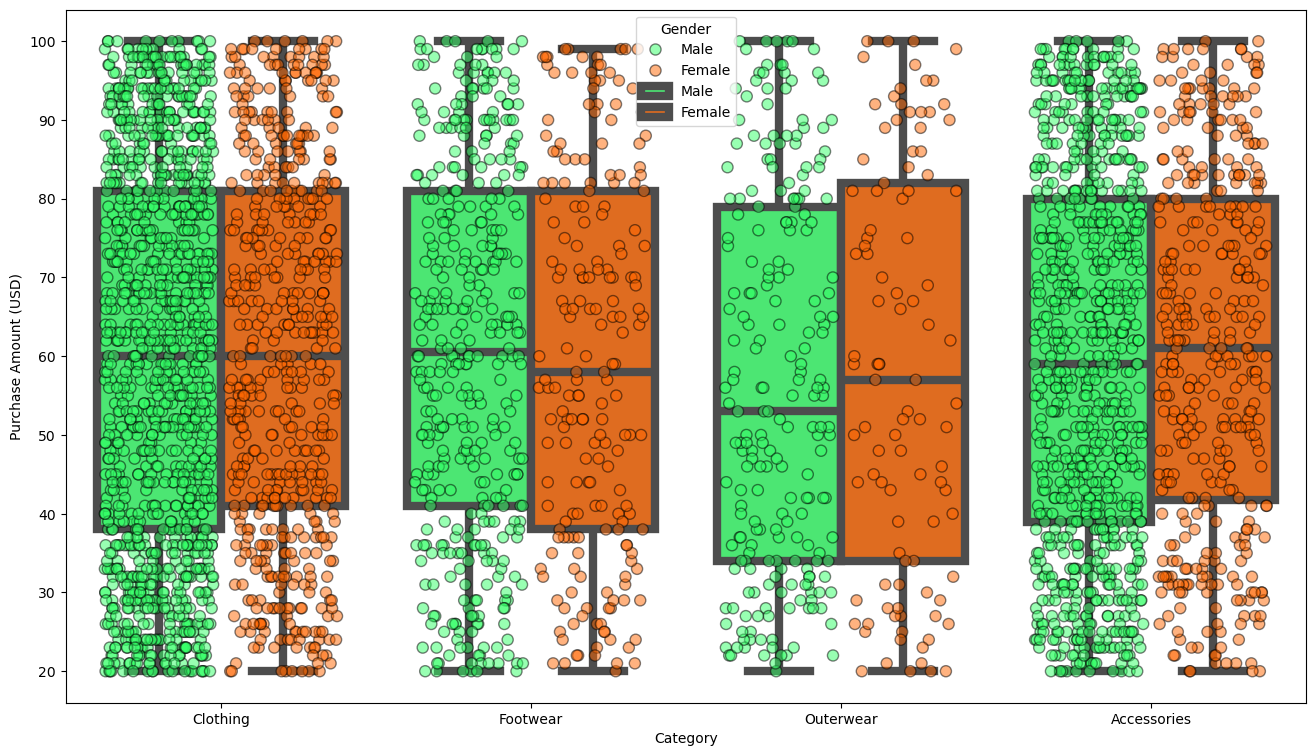

In [38]:
plt.figure(figsize=(16, 9))
# 定义参数字典，包含数据和绘图所需的基本参数
params = dict(data=data, x='Category', y='Purchase Amount (USD)', hue='Gender', dodge=True)

# 散点图
# **params 表示将 params 字典中的键值对作为关键字参数传递给 sns.stripplot 函数
# size=8: 设置散点的大小为 8
# jitter=0.35: 为散点添加抖动效果，使数据点分散开，避免重叠，抖动幅度为 0.35
# palette=['#33FF66', '#FF6600']: 使用自定义的颜色调色板，分别为两种性别的散点设置不同颜色
# edgecolor='black': 设置散点的边缘颜色为黑色
# linewidth=1: 设置散点的边缘线宽为 1
sns.stripplot(**params, size=8, jitter=0.35, palette=['#33FF66', '#FF6600'], edgecolor='black', linewidth=1,alpha=0.5)
# 箱型图
# **params 表示将 params 字典中的键值对作为关键字参数传递给 sns.boxplot 函数
# palette=['#BDBDBD', '#E0E0E0']: 使用自定义的颜色调色板，为不同性别的箱型图设置不同颜色
# linewidth=6: 设置箱型图的线宽为 6
sns.boxplot(**params, palette=['#33FF66', '#FF6600'], linewidth=6)

plt.show()

### （6）不同性别不同年龄购买频率

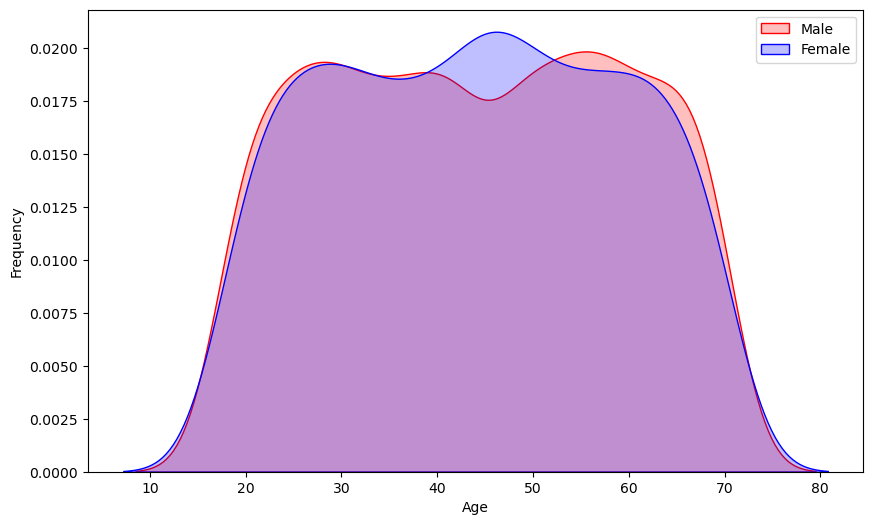

In [45]:
y = data['Gender']

plt.figure(figsize=(10,6))
# 绘制男性年龄的核密度估计图
# df["Age"][(y == 'Male') & (df["Age"].notnull())]：筛选出性别为男性且年龄不为空的数据
# color="Red"：设置图形的颜色为红色
# shade=True：对核密度估计图进行填充
g = sns.kdeplot(data["Age"][(y == 'Male') & (data["Age"].notnull())], color="Red", shade=True)
# 绘制女性年龄的核密度估计图
# ax=g：使用之前创建的轴对象，确保两张图绘制在同一图形中
# color="Blue"：设置图形的颜色为蓝色
# shade=True：对核密度估计图进行填充
g = sns.kdeplot(data["Age"][(y == 'Female') & (data["Age"].notnull())], ax=g, color="Blue", shade=True)

g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Male", "Female"])

## 4.用户画像分析

In [46]:
# 年龄区间划分函数，将年龄划分到不同阶段，方便后续统计分析
def categorize_age(age):
    if age < 25:
        return '青年'
    elif age < 45:
        return '中年'
    return '老年'
# 在数据框中新增年龄区间列
data['Age_Group'] = data['Age'].apply(categorize_age)
# 消费金额区间划分函数，这里简单划分高低两个档次，可按需细化调整
def categorize_amount(amount):
    if amount < 50:
        return '低消费'
    return '高消费'

# 在数据框中新增消费金额区间列
data['Amount_Group'] = data['Purchase Amount (USD)'].apply(categorize_amount)

#  综合考虑多维度交叉分析，以年龄区间和消费金额区间交叉为例
#mode()取众数mode()[0]，若有多个众数返回第一个众数
cross_analysis = data.groupby(['Age_Group', 'Amount_Group']).agg({
    'Frequency of Purchases': lambda x: x.mode()[0],
    'Payment Method': lambda x: x.mode()[0],
    'Item Purchased': lambda x: x.mode()[0]
}).reset_index()

print("多维度交叉（年龄区间与消费金额区间）的用户画像分析：")
cross_analysis

多维度交叉（年龄区间与消费金额区间）的用户画像分析：


,Age_Group,Amount_Group,Frequency of Purchases,Payment Method,Item Purchased
0,中年,低消费,Weekly,Debit Card,Sandals
1,中年,高消费,Monthly,Credit Card,Backpack
2,老年,低消费,Annually,Cash,Coat
3,老年,高消费,Quarterly,Venmo,Dress
4,青年,低消费,Every 3 Months,Bank Transfer,Pants
5,青年,高消费,Annually,Bank Transfer,Dress


## 随机森林模型训练

### 数据集划分

In [65]:
#train_test_split：用于将数据集划分为训练集和测试集
from sklearn.model_selection import train_test_split
#LabelEncoder：用于将分类标签转换为数字编码。
#StandardScaler：用于对数据进行标准化处理，将数据转换为均值为 0，标准差为 1 的标准正态分布。
from sklearn.preprocessing import LabelEncoder, StandardScaler
#RandomForestClassifier：随机森林分类器，用于构建分类模型。
from sklearn.ensemble import RandomForestClassifier
#classification_report、accuracy_score、confusion_matrix：用于评估分类模型的性能。
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [87]:
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 
                    'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

'''
LabelEncoder 是 scikit-learn 库（sklearn.preprocessing 模块）中的一个类，
主要用于将分类标签转换为数字编码。这在机器学习任务中非常有用，
因为许多机器学习算法要求输入数据为数值型，而不是字符串或其他类型的类别标签。
'''
encoder = LabelEncoder()

for col in  categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_Group,Amount_Group
0,1,55,1,2,1,53,16,0,7,3,...,1,2,1,1,1,14,5,3,老年,高消费
1,2,19,1,23,1,64,18,0,12,3,...,1,0,1,1,1,2,1,3,青年,高消费
2,3,50,1,11,1,73,20,2,12,1,...,1,1,2,1,1,23,2,6,老年,高消费
3,4,21,1,14,2,90,38,1,12,1,...,1,4,3,1,1,49,4,6,青年,高消费
4,5,45,1,2,1,49,36,1,21,1,...,1,1,2,1,1,31,4,0,老年,低消费
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,...,0,1,0,0,0,32,5,6,中年,低消费
3896,3897,52,0,0,0,49,14,0,23,1,...,0,4,5,0,0,41,0,1,老年,低消费
3897,3898,46,0,1,0,33,29,0,8,1,...,0,2,4,0,0,24,5,5,老年,低消费
3898,3899,44,0,17,2,77,22,2,3,2,...,0,4,1,0,0,24,5,6,中年,高消费


In [67]:
# Features (X) and Label (y)
X = data.drop(columns=['Customer ID', 'Subscription Status'])  # 将ID与label给去掉
y = data['Subscription Status']  # label

In [68]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
'''
从 scikit-learn 的预处理模块中导入 StandardScaler 类。
StandardScaler 是一个常用的工具，用于对数据进行标准化处理，
将数据转换为均值为 0，标准差为 1 的标准正态分布。
'''
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_Group,Amount_Group
0,0.718913,1,2,1,-0.285629,16,0,7,3,-0.907584,2,1,Yes,1,-0.785831,5,3,老年,高消费
1,-1.648629,1,23,1,0.178852,18,0,12,3,-0.907584,0,1,Yes,1,-1.616552,1,3,青年,高消费
2,0.390088,1,11,1,0.558882,20,2,12,1,-0.907584,1,2,Yes,1,-0.162789,2,6,老年,高消费
3,-1.517099,1,14,2,1.276716,38,1,12,1,-0.349027,4,3,Yes,1,1.637107,4,6,青年,高消费
4,0.061263,1,2,1,-0.454531,36,1,21,1,-1.466141,1,2,Yes,1,0.391025,4,0,老年,低消费


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   float64
 1   Gender                    3900 non-null   int64  
 2   Item Purchased            3900 non-null   int64  
 3   Category                  3900 non-null   int64  
 4   Purchase Amount (USD)     3900 non-null   float64
 5   Location                  3900 non-null   int64  
 6   Size                      3900 non-null   int64  
 7   Color                     3900 non-null   int64  
 8   Season                    3900 non-null   int64  
 9   Review Rating             3900 non-null   float64
 10  Payment Method            3900 non-null   int64  
 11  Shipping Type             3900 non-null   int64  
 12  Discount Applied          3900 non-null   object 
 13  Promo Code Used           3900 non-null   int64  
 14  Previous

In [88]:
# 将标签编码应用于剩余的对象类型列
# tpye 类型为'object'的则是未处理成标签编码的列类型
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])
X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_Group,Amount_Group
0,0.718913,1,2,1,-0.285629,16,0,7,3,-0.907584,2,1,1,1,-0.785831,5,3,1,1
1,-1.648629,1,23,1,0.178852,18,0,12,3,-0.907584,0,1,1,1,-1.616552,1,3,2,1
2,0.390088,1,11,1,0.558882,20,2,12,1,-0.907584,1,2,1,1,-0.162789,2,6,1,1
3,-1.517099,1,14,2,1.276716,38,1,12,1,-0.349027,4,3,1,1,1.637107,4,6,2,1
4,0.061263,1,2,1,-0.454531,36,1,21,1,-1.466141,1,2,1,1,0.391025,4,0,1,0


In [98]:
#划分为 train and test 数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [73]:
from sklearn import preprocessing 
'''
创建一个 LabelEncoder 的实例，LabelEncoder 是 preprocessing 模块中的一个类，用于将分类标签转换为数字编码。
'''
label_encoder = preprocessing.LabelEncoder() 

data['Discount Applied']= label_encoder.fit_transform(data['Discount Applied'])
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_Group,Amount_Group
0,1,55,1,2,1,53,16,0,7,3,...,1,2,1,1,1,14,5,3,老年,高消费
1,2,19,1,23,1,64,18,0,12,3,...,1,0,1,1,1,2,1,3,青年,高消费
2,3,50,1,11,1,73,20,2,12,1,...,1,1,2,1,1,23,2,6,老年,高消费
3,4,21,1,14,2,90,38,1,12,1,...,1,4,3,1,1,49,4,6,青年,高消费
4,5,45,1,2,1,49,36,1,21,1,...,1,1,2,1,1,31,4,0,老年,低消费
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,...,0,1,0,0,0,32,5,6,中年,低消费
3896,3897,52,0,0,0,49,14,0,23,1,...,0,4,5,0,0,41,0,1,老年,低消费
3897,3898,46,0,1,0,33,29,0,8,1,...,0,2,4,0,0,24,5,5,老年,低消费
3898,3899,44,0,17,2,77,22,2,3,2,...,0,4,1,0,0,24,5,6,中年,高消费


In [94]:
#模型训练
# 创建一个随机森林分类器对象，random_state=42 用于设置随机种子，保证每次训练结果相同，n_estimators=100 表示使用 100 棵决策树
model_RF = RandomForestClassifier(random_state=42, n_estimators=100)
# 使用训练集数据对随机森林模型进行训练
model_RF.fit(X_train, y_train)

# 使用训练好的模型对测试集数据进行预测
y_pred = model_RF.predict(X_test)

In [75]:
#评估模型

# 打印模型的准确率
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# 打印分类报告，包含精确率、召回率、F1 值等信息
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8602564102564103

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       569
           1       0.69      0.89      0.78       211

    accuracy                           0.86       780
   macro avg       0.82      0.87      0.84       780
weighted avg       0.88      0.86      0.87       780



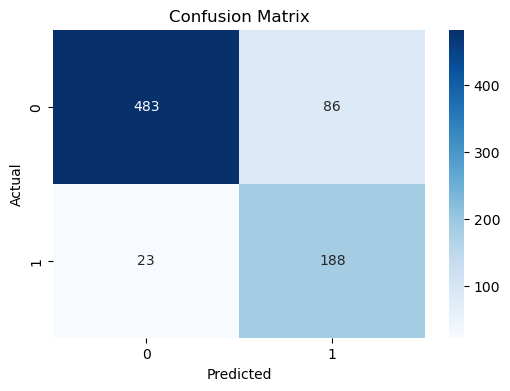

In [76]:
#  混淆矩阵可视化
plt.figure(figsize=(6, 4))
#使用 seaborn 的 heatmap 函数绘制混淆矩阵，annot=True 表示在矩阵中显示数字，fmt='d' 表示数字格式为整数，cmap='Blues' 表示使用蓝色调的颜色映射
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

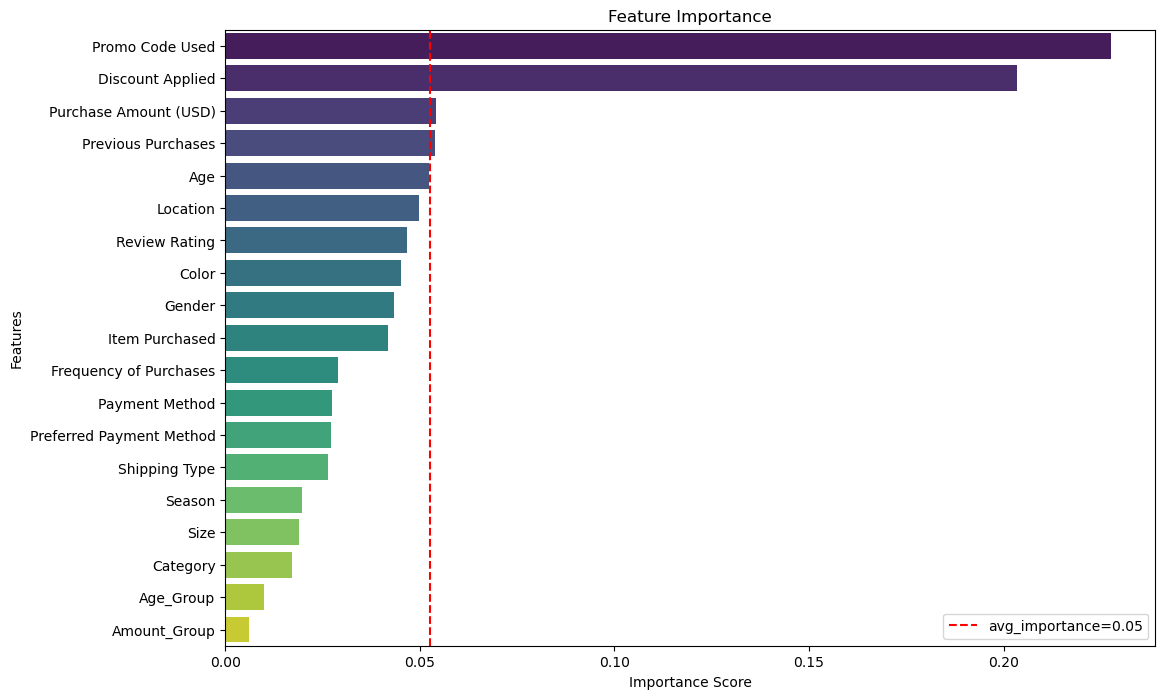

In [77]:
#重要性排序
# 获取随机森林模型中每个特征的重要性得分
importances = model_RF.feature_importances_
# 获取特征的名称
features = X.columns

# 将特征重要性和特征名称组合在一起，并按照重要性进行降序排序
#reverse=True 表示降序
feature_importance_data = sorted(zip(importances, features), reverse=True)
#zip(*...) 是 Python 的一个特殊语法，它将列表中的元组解包并重新组合。
importances_sorted, features_sorted = zip(*feature_importance_data)

plt.figure(figsize=(12, 8))
# 绘制柱状图，按照降序排列的顺序绘制
sns.barplot(x=importances_sorted, y=features_sorted, palette='viridis')

# 计算重要性的均值
avg_importance = np.mean(importances_sorted)

# 添加红色竖立的虚线表示重要性均值
plt.axvline(x=avg_importance, color='r', linestyle='--', label=f'avg_importance={avg_importance:.2f}')

plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
# 添加图例，设置图例位置等属性让其显示更合理
plt.legend(fontsize='medium')
plt.show()



In [79]:
higher_than_avg_features = [(feature, importance) for importance, feature in zip(importances_sorted, features_sorted) if importance > avg_importance]
print("高于平均值的属性：")
for feature, importance in higher_than_avg_features:
    print(f"{feature}({importance:.3f})")

高于平均值的属性：
Promo Code Used(0.228)
Discount Applied(0.203)
Purchase Amount (USD)(0.054)
Previous Purchases(0.054)


## 神经网络

In [80]:
from sklearn.neural_network import MLPClassifier

model_bp = MLPClassifier(hidden_layer_sizes=(5, 3))
model_bp.fit(X_train, y_train)

y_pred = model_bp.predict(X_test)

In [81]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8602564102564103

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90       569
           1       0.67      0.96      0.79       211

    accuracy                           0.86       780
   macro avg       0.83      0.89      0.84       780
weighted avg       0.90      0.86      0.87       780



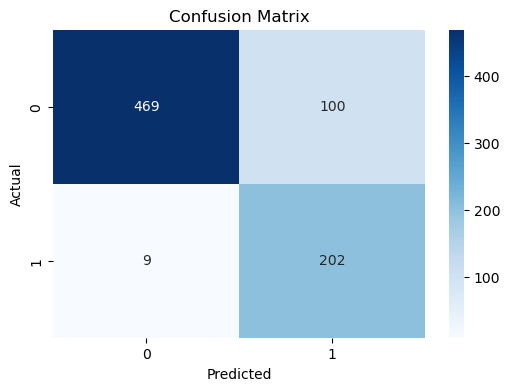

In [82]:
#  混淆矩阵可视化
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 机器学习模型对比分析



具体分析：

    在准确率方面：随机森林与神经网络模型的十分接近，准确率基本一致。
    在类别 1 识别：首先，在召回率方面神经网络（95%）相比于随机森林的（89%）有优势。但是二者的准确率都较低，神经网络为66%，随机森林为69%。
    在类别 0 识别：二者的精确率与找回率都较高。其中神经网络分别为（99%、82%），随机森林分别为（95%、85%），二者之间差距不明显。

总结对比可以得知，在准确率、类别0识别的差距都不明显的情况下，神经网络在类别1的识别效果更佳。

但是，神经网络在类别1的识别优势不是特别大，在考虑随机森林具有较强解释性（例如给出的重要性排序图）的情况下，这点优势可以忽略，所以综合对比分析可以得到，两个模型中，随机森林是更优的一个选择。


In [86]:
n_columns = 6
columns =['buy','maintain','doors','persons','boot','safety','accept']
s = np.arange(n_columns)
a = dict(list(zip(s,columns)))
a

{0: 'buy', 1: 'maintain', 2: 'doors', 3: 'persons', 4: 'boot', 5: 'safety'}